In [26]:
import numpy as np
import scanpy as sc
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from gene_selection import min_complexity_acc, min_acquisition_acc,min_complexity_converge, min_acquisition_converge
from activeSVC import min_complexity, min_acquisition

# Load zebrahub dataset (1dpf)

In [ ]:
# data_norm=normalize(np.transpose(data),axis=1, norm='l2')
# data_norm

In [7]:
path_of_data='/mnt/ibm_lg/alejandro/danio-atlas/zebrahub/final_objects/v4/zf_atlas_24hpf_v4_release.h5ad'
data=sc.read_h5ad(path_of_data)
labelmodel=LabelEncoder()
target=labelmodel.fit_transform(data.obs.zebrafish_anatomy_ontology_class.values)

# normalize?
#data_norm=normalize(np.transpose(data),axis=1, norm='l2')
X_train,X_test,y_train,y_test=train_test_split(normalize(data.X,axis=1),target,test_size=0.2,random_state=1)


In [13]:
# min_complexity or min_acquisition from activeSVC
feature_selected, num_samples_list, train_errors, test_errors, train_scores, test_scores,step_times=\
min_complexity(X_train, y_train, X_test, y_test, num_features=100, num_samples=100,init_features=1,init_samples=None,class_weight='balanced')


Elapsed time: 32.0986 seconds
feature 0 : gene [12885]  100 samples
training error=178.67066795269457 test error=186.14027664490442
training accuracy=0.07697596015369548 test accuracy=0.0766784933421446
Elapsed time: 30.3696 seconds
feature 1 : gene 12733  200 samples
training error=158.4749031162533 test error=161.36822875319191
training accuracy=0.12738761604060936 test accuracy=0.1280442996006666
Elapsed time: 29.9450 seconds
feature 2 : gene 23944  298 samples
training error=147.3867382205908 test error=141.80453413643207
training accuracy=0.16659229089413782 test accuracy=0.1706752101162273
Elapsed time: 29.9493 seconds
feature 3 : gene 8238  398 samples
training error=134.4936529700074 test error=122.92340332189823
training accuracy=0.2418342174993391 test accuracy=0.2368743440134806
Elapsed time: 30.4796 seconds
feature 4 : gene 31884  494 samples
training error=132.27821599064814 test error=129.36596054036934
training accuracy=0.2786904960943503 test accuracy=0.2592217819043416

Elapsed time: 29.4157 seconds
feature 41 : gene 25708  3048 samples
training error=40.45175817445962 test error=44.733114373191434
training accuracy=0.7700416572778165 test accuracy=0.7507699965642876
Elapsed time: 31.9285 seconds
feature 42 : gene 28835  3087 samples
training error=39.80072949338181 test error=44.56770437975561
training accuracy=0.7732739051542099 test accuracy=0.7570815743837274
Elapsed time: 31.1976 seconds
feature 43 : gene 30797  3129 samples
training error=38.4745355066066 test error=43.17268439406145
training accuracy=0.7798543756302232 test accuracy=0.7572482476825341
Elapsed time: 30.1725 seconds
feature 44 : gene 21279  3165 samples
training error=38.01055477949502 test error=42.17422027482832
training accuracy=0.7804439813813149 test accuracy=0.7584327358797214
Elapsed time: 30.2958 seconds
feature 45 : gene 19675  3199 samples
training error=37.76661606186072 test error=41.69870347625292
training accuracy=0.7817224791774057 test accuracy=0.7590851254587414


Elapsed time: 34.0517 seconds
feature 82 : gene 11497  3909 samples
training error=21.488929418743883 test error=30.47560502246167
training accuracy=0.8760613169420839 test accuracy=0.852387264790834
Elapsed time: 33.1823 seconds
feature 83 : gene 12670  3910 samples
training error=21.48009111792253 test error=30.2838581228255
training accuracy=0.8765622994111985 test accuracy=0.8532623450734288
Elapsed time: 32.7344 seconds
feature 84 : gene 26117  3918 samples
training error=20.290145522014615 test error=28.85341672814414
training accuracy=0.8795388481299599 test accuracy=0.8558436918579243
Elapsed time: 32.3115 seconds
feature 85 : gene 22833  3922 samples
training error=19.73985948199776 test error=27.943934528264922
training accuracy=0.8843368117265579 test accuracy=0.8623695416569214
Elapsed time: 33.5424 seconds
feature 86 : gene 28537  3926 samples
training error=19.129488284151257 test error=27.420071943844224
training accuracy=0.886735335439983 test accuracy=0.865388148110333

In [ ]:
feature_selected, num_samples_list, train_errors, test_errors, train_scores, test_scores,step_times

Text(0.5, 1.0, 'test dataset')

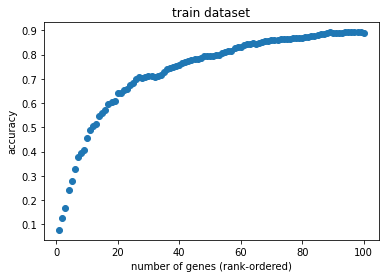

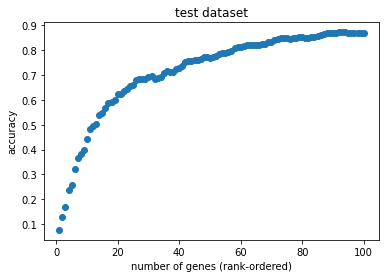

In [24]:
import matplotlib.pyplot as plt

plt.scatter(range(1,101),train_scores)
plt.xlabel("number of genes (rank-ordered)")
plt.ylabel("accuracy")
plt.title("train dataset")

plt.figure()
plt.scatter(range(1,101),test_scores)
plt.xlabel("number of genes (rank-ordered)")
plt.ylabel("accuracy")
plt.title("test dataset")

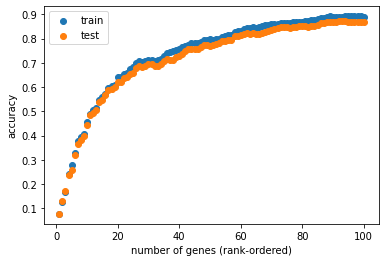

In [25]:
plt.scatter(range(1,101),train_scores)
plt.scatter(range(1,101),test_scores)
plt.xlabel("number of genes (rank-ordered)")
plt.ylabel("accuracy")
plt.legend(["train","test"])

In [15]:
data.var_names[feature_selected]

Index(['tmsb4x', 'ttn.1', 'nova2', 'krt4', 'hist1h4l-11', 'krt8', 'tpm4a',
       'sox3', 'si:ch211-137a8.4', 'hbbe3', 'apoc1', 'col1a2', 'ttn.2',
       'pmp22a', 'hsp90aa1.1', 'cyt1', 'tuba1c', 'actc1b', 'krt18a.1', 'mdka',
       'cyt1l', 'CR318588.4', 'fabp7a', 'mdkb', 'pfn1', 'fabp11a', 'tuba1a',
       'icn', 'atp2a1', 'sox19a', 'hist1h4l-6', 'elavl3', 'tnni2b.1',
       'si:ch211-286o17.1', 'sparc', 'vim', 'fstl1a', 'sox11b', 'apoeb',
       'postnb', 'col11a1a', 'col5a1', 'pcna', 'cxcl12b', 'mki67', 'cfl1l',
       'he1.1', 'tuba8l3', 'hist1h4l-16', 'hbae3', 'zgc:110425', 'tnnt2c',
       'mycn', 'mylpfa', 'ahnak', 'lsp1a', 'tmsb1', 'en2b', 'col1a1a', 'cdh6',
       'id3', 'notch3', 'npm1a', 'col28a2a', 'cenpf', 'h1-0', 'marcksl1a',
       'histh1l', 'epcam', 'myt1a', 'bcam', 'cxcl12a', 'ptmaa', 'acta1b',
       'NC_002333.17', 'si:dkey-261h17.1', 'calm1a', 'dla', 'zfhx4', 'meox1',
       'rbp5', 'fabp3', 'acta1a', 'myl1', 'zbtb16a', 'marcksl1b', 'myl10',
       'hoxb3a', 'efem

# Save the result in dataframe


In [ ]:
feature_selected, num_samples_list, train_errors, test_errors, train_scores, test_scores,step_times

In [86]:
range(1,100)

range(1, 100)

In [87]:

df = pd.DataFrame(data = list(zip(data.var_names[feature_selected].to_list(), num_samples_list, 
                                  train_scores, test_scores, train_errors, test_errors)),
                  columns = ["gene_names", "num_samples","train_scores","test_scores","train_errors","test_erors"],
                  index=range(1,101))
df

,gene_names,num_samples,train_scores,test_scores,train_errors,test_erors
1,tmsb4x,100,0.076976,0.076678,178.670668,186.140277
2,ttn.1,200,0.127388,0.128044,158.474903,161.368229
3,nova2,298,0.166592,0.170675,147.386738,141.804534
4,krt4,398,0.241834,0.236874,134.493653,122.923403
5,hist1h4l-11,494,0.278690,0.259222,132.278216,129.365961
...,...,...,...,...,...,...
96,si:ch211-113a14.12,3978,0.891535,0.869117,18.831046,26.862262
97,plecb,3986,0.892102,0.869491,18.739984,26.518802
98,ncl,3988,0.892283,0.868605,18.797211,26.399541
99,tmsb,3993,0.891309,0.867874,19.019374,26.501574


Text(0, 0.5, 'number of cells sampled')

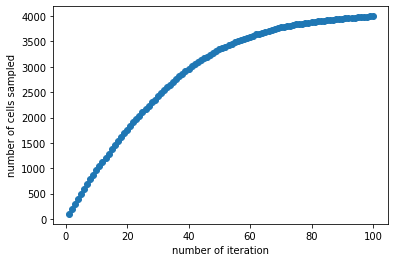

In [89]:
plt.scatter(range(1,101), df["num_samples"])
plt.xlabel("number of iteration")
plt.ylabel("number of cells sampled")

In [90]:
df.to_csv("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/zebrahub/ActiveSVM_zebrahub_1dpf_result_df.csv")

# Compare with the marker genes from Xiang Zhao

- we have a csv file of a set of marker genes for cell-types annotated by Xiang Zhao.
We will make a comparison to the result of Active SVM here.



In [145]:
marker_genes = pd.read_csv("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/zebrahub/1dpf_cell_annotation_maker_genes_zebrahub_XZ.csv")

In [146]:
marker_genes

,Unnamed: 0,leiden,cell_annotation,timepoint,version,annotation_human_readable,marker genes,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,zfa_id,is_cell_type,is_in_zfin,comments,ml reply,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,0,0,diencephalon_pax6a_fgfr3_sox2_foxb1a,30somite,before_aug_9,diencephalon,pax6a,fgfr3,sox2,foxb1a,...,ZFA:0000101,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,diencephalon_pax6a_fgfr3_sox2_foxb1a,30somite,aug_9,diencephalon,pax6a,fgfr3,sox2,foxb1a,...,ZFA:0000101,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,optic_cup_foxg1b_rx1_pax10,30somite,before_aug_9,optic cup,foxg1b,rx1,pax10,NaN,...,ZFA:0001202,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,optic_cup_foxg1b_rx1_pax10,30somite,aug_9,optic cup,foxg1b,rx1,pax10,NaN,...,ZFA:0001202,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,2,hematopoietic_system_hbbe2_slc4a1a_gata1a,30somite,before_aug_9,hematopoietic system,hbbe2,slc4a1a,gata1a,NaN,...,ZFA:0005023,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,24,30,trigeminal_ganglion_isl1_vim_elavl3,30somite,aug_9,trigeminal ganglion,isl1,vim,elavl3,NaN,...,ZFA:0000295,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,25,31,floor_plate_neural_tube_ ntn1b_foxa2_shha,30somite,before_aug_9,floor plate neural tube,ntn1b,foxa2,shha,NaN,...,ZFA:0001434,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,25,31,floor_plate_neural_tube_ ntn1b_foxa2_shha,30somite,aug_9,floor plate neural tube,ntn1b,foxa2,shha,NaN,...,ZFA:0001434,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,26,32,notochord_lft1_tbxta_col9a2,30somite,before_aug_9,notochord,lft1,tbxta,col9a2,NaN,...,ZFA:0000135,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
marker_genes.columns

Index(['Unnamed: 0', 'leiden', 'cell_annotation', 'timepoint', 'version',
       'annotation_human_readable', 'marker genes', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'cell ontology term', 'cell ontology id', 'uberon term', 'uberon id',
       'Zebrafish_Anatomy_Ontology', 'zfa_id', 'is_cell_type', 'is_in_zfin',
       'comments', 'ml reply', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [140]:
dict_marker_genes = {0:"1"}
dict_marker_genes

{0: '1'}

In [142]:
dict_marker_genes

SyntaxError: invalid syntax (556939919.py, line 1)

In [166]:
# extract only the august 9th version as the previous version is just a duplicate (more or less)
df_marker_genes = marker_genes[marker_genes["version"]=="aug_9"]

# generate a dictionary of cell-types and marker genes
dict_marker_genes = {}

for index in df_marker_genes.index:
    cell_type = df_marker_genes.loc[index,"cell_annotation"]
    list_genes = marker_genes.loc[index,['Unnamed: 7', 'Unnamed: 8','Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']]
    list_genes = list_genes.to_list()
    list_markers = [item for item in list_genes if not(pd.isnull(item)) == True]
    
    dict_marker_genes[cell_type] = list_markers
dict_marker_genes

{'diencephalon_pax6a_fgfr3_sox2_foxb1a': ['fgfr3', 'sox2', 'foxb1a'],
 'optic_cup_foxg1b_rx1_pax10': ['rx1', 'pax10'],
 'hematopoietic_system_hbbe2_slc4a1a_gata1a': ['slc4a1a', 'gata1a'],
 'neuron_tubb5_elavl3_hes6_map2': ['elavl3', 'hes6', 'map2'],
 'midbrain_hindbrain_boundary_en2a_en2b_sox2b': ['en2b', 'sox2b'],
 'somite_meox1_fgf8a_apeob_tbxta': ['fgf8a', 'apeob', 'tbxta'],
 'myotome_fxr2_myog_hsp90aa1.1': ['myog', 'hsp90aa1.1'],
 'fin_fibina_tbx15_ptx3': ['tbx15', 'ptx3'],
 'muscle_pioneer_mylz3_desma_tpma_ak1_eno3_en1a': ['desma',
  'tpma',
  'ak1',
  'eno3',
  'en1a'],
 'telencephalon_fgf8a_fezf1_fezf2_foxg1a_six3a': ['fezf1',
  'fezf2',
  'foxg1a',
  'six3a'],
 'epidermis_tp63_dlx3b_bmp2b': ['dlx3b', 'bmp2b'],
 'hindbrain_olig4_atoh1a_wnt8b_egr2b': ['atoh1a', 'wnt8b', 'egr2b'],
 'spinal_cord_sp8b_olig2_wnt4_nkx6.1': ['olig2', 'wnt4', 'nkx6.1'],
 'optic_tectum_her15.1_plp1a_lfng': ['plp1a', 'lfng'],
 'primitive_heart_tube_gata5_gata6_tnni1b': ['gata6', 'tnni1b'],
 'otic_vesicle_

In [179]:
# extract 
list_all_marker_genes_1dpf = sum(dict_marker_genes.values(), [])
list_all_marker_genes_1dpf

['fgfr3',
 'sox2',
 'foxb1a',
 'rx1',
 'pax10',
 'slc4a1a',
 'gata1a',
 'elavl3',
 'hes6',
 'map2',
 'en2b',
 'sox2b',
 'fgf8a',
 'apeob',
 'tbxta',
 'myog',
 'hsp90aa1.1',
 'tbx15',
 'ptx3',
 'desma',
 'tpma',
 'ak1',
 'eno3',
 'en1a',
 'fezf1',
 'fezf2',
 'foxg1a',
 'six3a',
 'dlx3b',
 'bmp2b',
 'atoh1a',
 'wnt8b',
 'egr2b',
 'olig2',
 'wnt4',
 'nkx6.1',
 'plp1a',
 'lfng',
 'gata6',
 'tnni1b',
 'stm',
 'agr2',
 'kdrl',
 'atp1b1a',
 'twist1a',
 'foxc1b',
 'pdgfra',
 'myo1eb',
 'cdh1',
 'cfl1l',
 'foxd3',
 'crestin',
 'cxcr3.2',
 'cebpb',
 'tbxta',
 'tbx16',
 'gsnb',
 'cldn7b',
 'dusp2',
 'hand2',
 'osr1',
 'hgfa',
 'agr1',
 'ppl',
 'evpla',
 'apobec2a',
 'actc1a',
 'gata6',
 'cebpa',
 'foxe3',
 'tgfb3',
 'prox1a',
 'pmela',
 'pah',
 'mitfa',
 'gch2',
 'cd63',
 'he1.2',
 'vim',
 'elavl3',
 'foxa2',
 'shha',
 'tbxta',
 'col9a2']

In [184]:
set(df["gene_names"])

{'CR318588.4',
 'NC_002333.17',
 'acta1a',
 'acta1b',
 'actc1b',
 'ahnak',
 'apoc1',
 'apoeb',
 'atp2a1',
 'bcam',
 'calm1a',
 'cdh6',
 'cenpf',
 'cfl1l',
 'col11a1a',
 'col1a1a',
 'col1a2',
 'col28a2a',
 'col5a1',
 'cxcl12a',
 'cxcl12b',
 'cyt1',
 'cyt1l',
 'dla',
 'efemp2a',
 'elavl3',
 'en2b',
 'epcam',
 'fabp11a',
 'fabp3',
 'fabp7a',
 'fstl1a',
 'h1-0',
 'hbae1.3',
 'hbae3',
 'hbbe1.3',
 'hbbe3',
 'he1.1',
 'hist1h4l-11',
 'hist1h4l-16',
 'hist1h4l-6',
 'histh1l',
 'hoxb3a',
 'hsp90aa1.1',
 'icn',
 'id1',
 'id3',
 'krt18a.1',
 'krt4',
 'krt8',
 'lsp1a',
 'marcksl1a',
 'marcksl1b',
 'mdka',
 'mdkb',
 'meox1',
 'mki67',
 'mycn',
 'myhz1.3',
 'myl1',
 'myl10',
 'mylpfa',
 'mylz3',
 'myt1a',
 'ncl',
 'notch3',
 'nova2',
 'npm1a',
 'pcna',
 'pfn1',
 'pleca',
 'plecb',
 'pmp22a',
 'postnb',
 'ptmaa',
 'rbp5',
 'si:ch211-113a14.12',
 'si:ch211-137a8.4',
 'si:ch211-286o17.1',
 'si:dkey-261h17.1',
 'sox11b',
 'sox19a',
 'sox3',
 'sparc',
 'stmn1b',
 'tmsb',
 'tmsb1',
 'tmsb4x',
 'tnni2b.1'

In [176]:
df.loc[:,"gene_names"]

1                  tmsb4x
2                   ttn.1
3                   nova2
4                    krt4
5             hist1h4l-11
              ...        
96     si:ch211-113a14.12
97                  plecb
98                    ncl
99                   tmsb
100                 mylz3
Name: gene_names, Length: 100, dtype: object

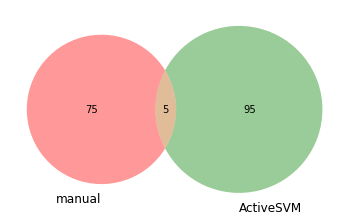

In [186]:
from matplotlib_venn import venn2

venn2([set(list_all_marker_genes_1dpf),set(df["gene_names"])], ('manual','ActiveSVM') )
plt.show()

In [188]:
list(set(list_all_marker_genes_1dpf) & set(df["gene_names"]))

['cfl1l', 'en2b', 'hsp90aa1.1', 'elavl3', 'vim']

In [187]:
sc.pl.umap(data, 
           color=["zebrafish_anatomy_ontology_class"]+)

AnnData object with n_obs × n_vars = 12914 × 32060
    obs: 'n_genes', 'n_counts', 'fish', 'timepoint_cluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_nc', 'pct_counts_nc', 'zebrafish_anatomy_ontology_class', 'zebrafish_anatomy_ontology_id', 'developmental_stage', 'timepoint'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'nc', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'timepoint_colors', 'zebrafish_anatomy_ontology_class_colors'
    obsm: 'X_umap'
    layers: 'counts'

In [ ]:
path_of_data='/mnt/ibm_lg/alejandro/danio-atlas/zebrahub/final_objects/v4/zf_atlas_24hpf_v4_release.h5ad'

In [ ]:
# gene_selection.py: min_complexity_converge, min_acquisition_converge
feature_selected, num_samples_list, train_errors, test_errors, train_scores, test_scores=\
min_complexity_converge(X_train, y_train, X_test, y_test, num_samples=100,init_features=1,init_samples=None,class_weight='balanced')


In [ ]:
# gene_selection.py: min_complexity_acc, min_acquisition_acc
feature_selected, num_samples_list, train_errors, test_errors, train_scores, test_scores=\
min_complexity_acc(X_train, y_train, X_test, y_test, accuracy=0.7,num_samples=100,init_features=1,init_samples=None,class_weight='balanced')

